In [3]:
# Logistic regression

# binary Classification

#https://file+.vscode-resource.vscode-cdn.net/var/folders/zn/h25h9rz1773b5qbn400l6b3m0000gn/T/TemporaryItems/NSIRD_screencaptureui_YB5asm/Screenshot%202023-12-20%20at%201.15.39%20PM.png?version%3D1703058356401

#Goal: Maximum log likelihood using gradiant ascent


 

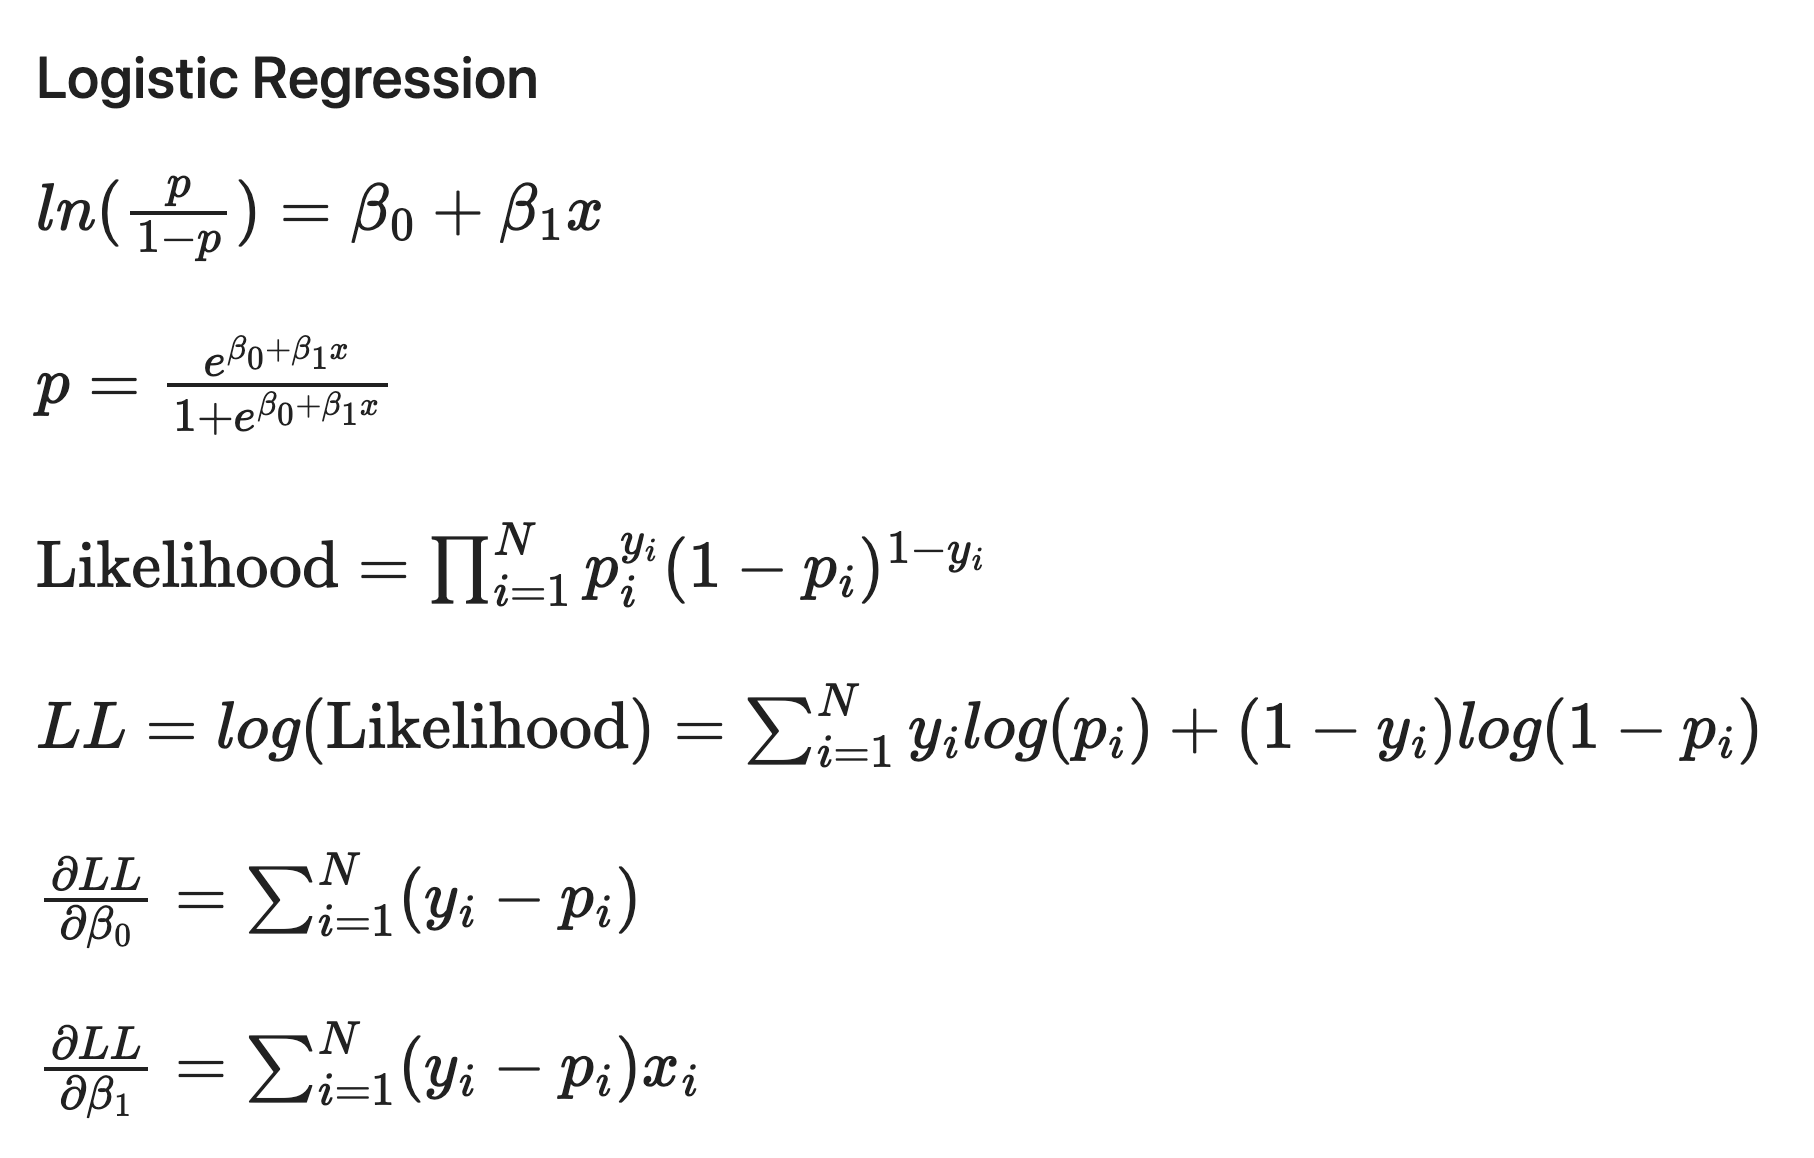

# Logistic regression

# binary Classification

https://file+.vscode-resource.vscode-cdn.net/var/folders/zn/h25h9rz1773b5qbn400l6b3m0000gn/T/TemporaryItems/NSIRD_screencaptureui_YB5asm/Screenshot%202023-12-20%20at%201.15.39%20PM.png?version%3D1703058356401

#Goal: Maximum log likelihood using gradiant ascent



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [7]:
class_1 = np.random.random(20)*2+1
class_2 = np.random.random(20)*2-0.5

In [8]:
data = pd.DataFrame()
data['x'] = np.concatenate([class_1,class_2])
data['y'] = [0]*20 +[1]*20
data = data.sample(frac=1)

In [11]:
data.head(5)


,x,y
17,1.917056,0
13,2.210493,0
4,2.181537,0
2,1.384029,0
28,0.961082,1


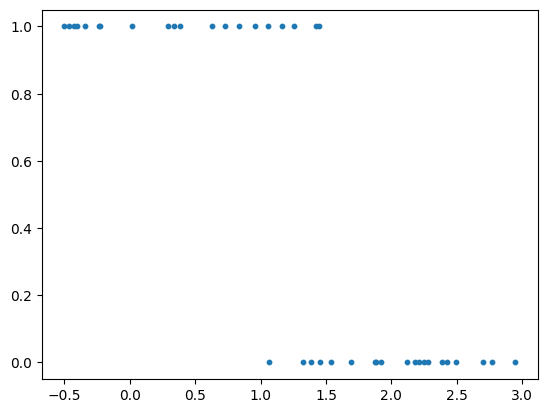

In [12]:
plt.scatter(data.x,data.y,s=10)

In [16]:
def cal_gradient_loglikelihood(curr_betas,data):
    numerator= np.exp(curr_betas[0]+curr_betas[1]*data.x)
    p = numerator/(1+numerator)
    partial_0 = np.sum(data.y-p)
    partial_1 = np.sum((data.y-p)*data.x)
    
    return np.array([partial_0,partial_1])

In [17]:
curr_betas = np.array([0.0,0.0])
diff = np.inf
lr =0.1

while diff > 0.001:
    grad = cal_gradient_loglikelihood(curr_betas,data)
    diff = abs(grad).sum()
    curr_betas += lr*grad
    
    

print('Current value of beta is {}'.format(curr_betas))

Current value of beta is [ 8.59826183 -6.53016894]


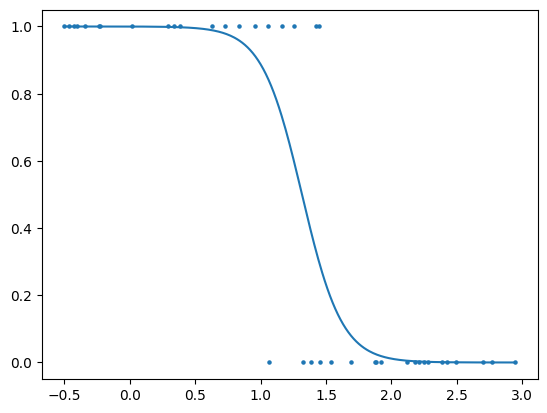

In [18]:
plt.scatter(data.x,data.y,s=5)

x_vals = np.arange(data.x.min(),data.x.max(),0.01)
p_vals =1/(1+np.exp(-(curr_betas[0]+curr_betas[1]*x_vals)))
plt.plot(x_vals,p_vals)

In [21]:
lreg = LogisticRegression(penalty='none')
lreg.fit(np.array(data.x).reshape(-1,1),data.y)
print('beta_0:%s'%lreg.intercept_[0])
print('beta_1:%s'%lreg.coef_[0][0])


beta_0:8.610884658958591
beta_1:-6.539480889622253


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


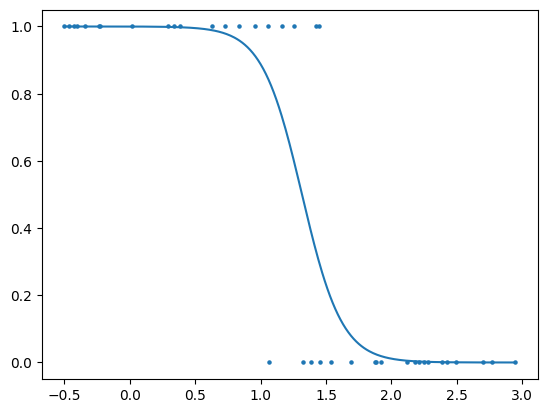

In [24]:
plt.scatter(data.x,data.y,s=5)

x_vals = np.arange(data.x.min(),data.x.max(),0.01)
p_vals =1/(1+np.exp(-(lreg.intercept_[0]+lreg.coef_[0][0]*x_vals)))
plt.plot(x_vals,p_vals)